<AxesSubplot:xlabel='leg_angle [deg]', ylabel='velocity [m/s]'>

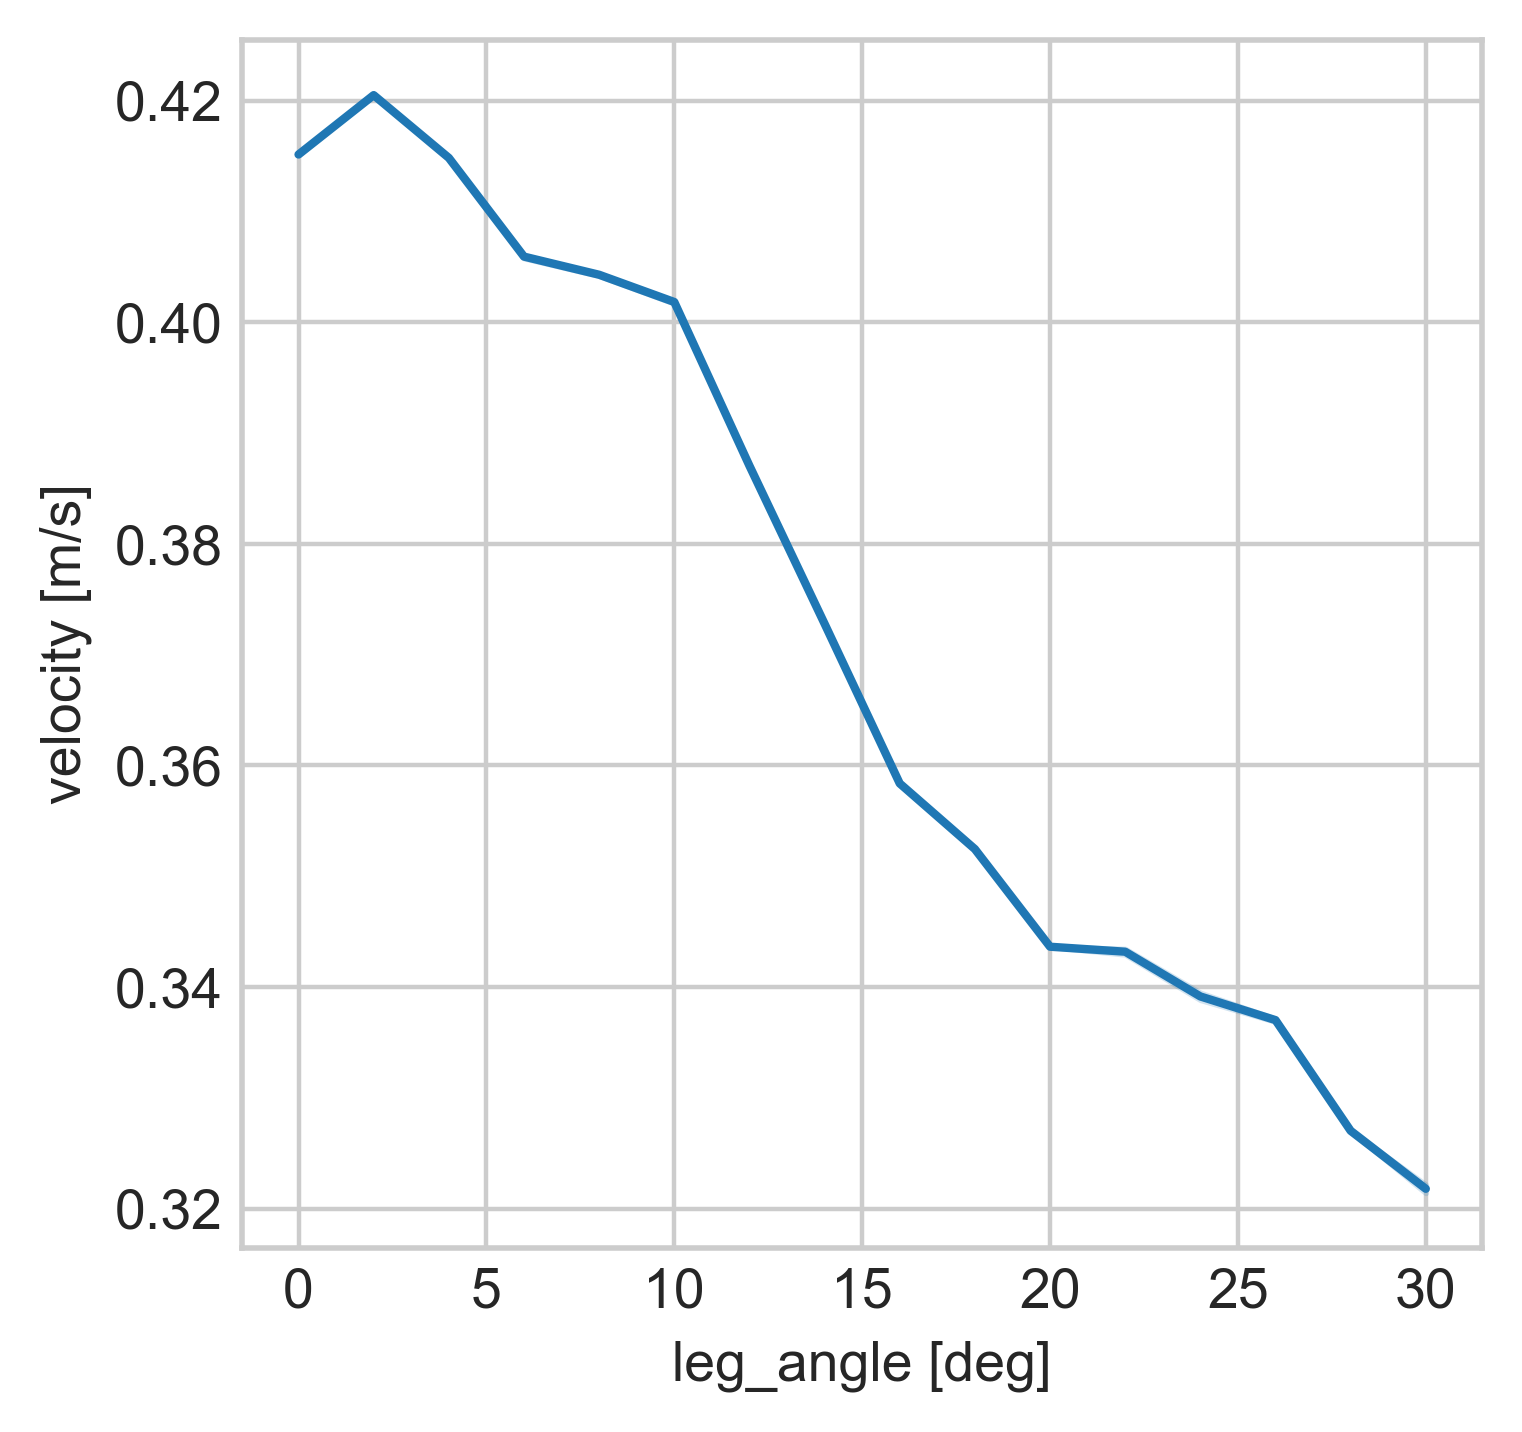

In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

CSV_FILE_PATH = './vel_alternate.csv'
df = pd.read_csv(CSV_FILE_PATH)
# print(df.head())
fig, ax = plt.subplots(1,1,figsize=(4,4),dpi=200)
sns.lineplot(data=df, x="leg_angle [deg]", y="velocity [m/s]",ax=ax)

In [3]:
df.head(10)

,leg_angle [deg],velocity [m/s]
0,0.0,0.439488
1,0.0,0.439954
2,0.0,0.440300
3,0.0,0.440135
4,0.0,0.440000
5,0.0,0.440049
6,0.0,0.440014
7,0.0,0.440023
8,0.0,0.440023
9,0.0,0.440051


<AxesSubplot:xlabel='leg_angle [deg]', ylabel='velocity [rads/s]'>

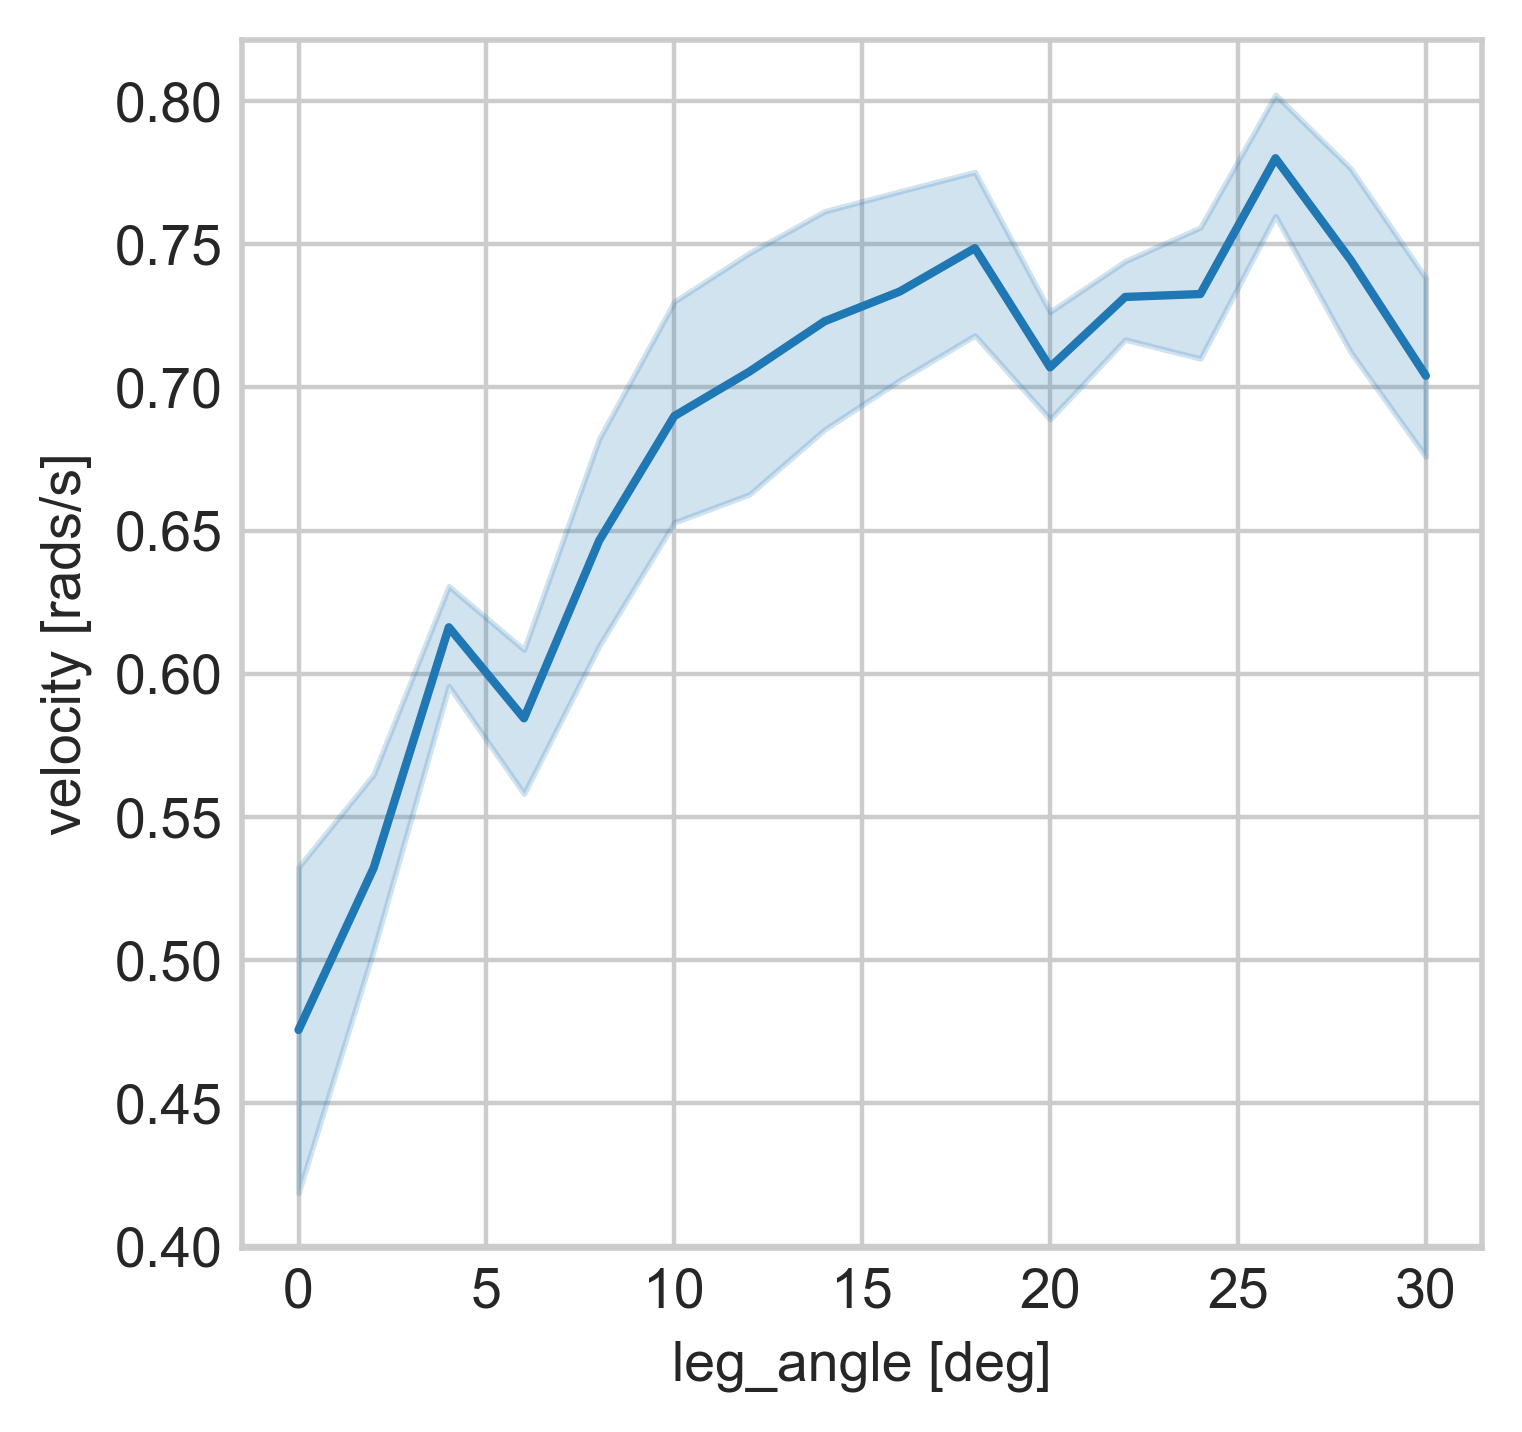

In [40]:
CSV_FILE_PATH = './vel_rotate.csv'
df = pd.read_csv(CSV_FILE_PATH)
# print(df.head())
fig, ax = plt.subplots(1,1,figsize=(4,4),dpi=200)
sns.lineplot(data=df, x="leg_angle [deg]", y="velocity [rads/s]",ax=ax)